# OpenCV 103 - Histograms

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image = cv2.imread("beach.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Window", image)

k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
    
%matplotlib inline

## Image histograms

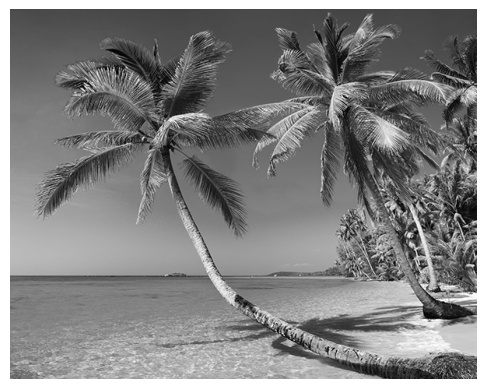

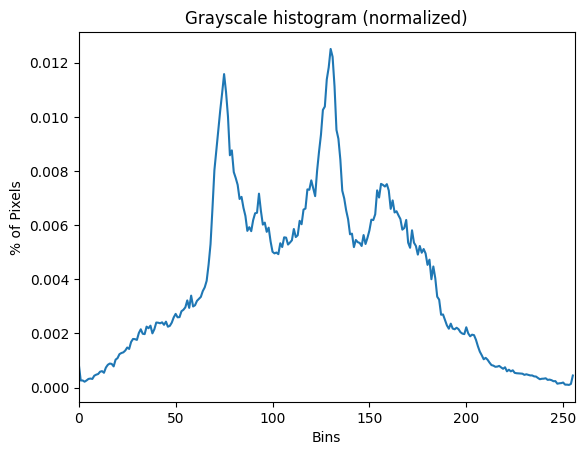

In [2]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# plotting the image also
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))

hist /= hist.sum() # normalizing
plt.figure()
plt.title("Grayscale histogram (normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()

## Histogram and and adpative histogram equalization (CLAHE)

In [3]:
image = cv2.imread("beach.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Window", image)

# simple histogram equalization
equalized = cv2.equalizeHist(gray)

# adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))
equalizedClahe = clahe.apply(gray)

cv2.imshow("Simple", equalized)
cv2.imshow("CLAHE", equalizedClahe)


k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
    
%matplotlib inline

## Histogram matching

In [4]:
from skimage import exposure

src = cv2.imread("empire_state_cloudy.png")
ref = cv2.imread("empire_state_sunset.png")

matched = exposure.match_histograms(src, ref, channel_axis=-1)

cv2.imshow("Source", src)
cv2.imshow("Reference", ref)
cv2.imshow("Matched", matched)

k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()

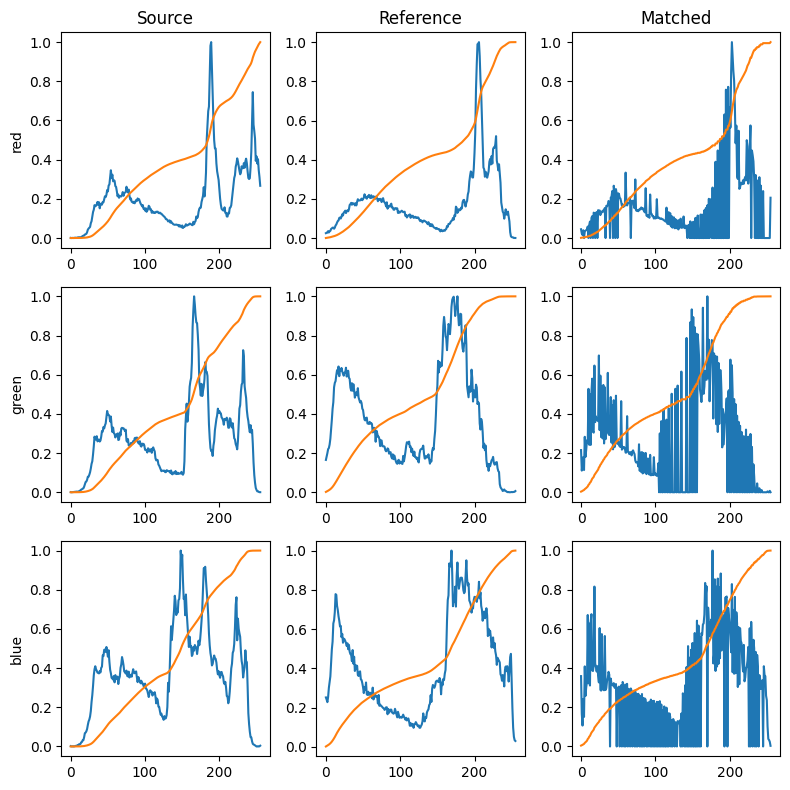

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate((src, ref, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()